# Data Manipulation in Python (CS2006 P2)

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt;
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import operator
plotly.tools.set_credentials_file(username='ir47', api_key='k0qjUbd6owGLygMXJPZ5')

In [2]:
df=pd.read_csv("../data/CometLanding.csv",encoding="UTF-8")

In [3]:
len(df)

77319

In [4]:
df.drop_duplicates(['id_str'],inplace = True)

In [5]:
numTweets = len(df)

In [6]:
print("Total number of Tweets: " + str(numTweets))

Total number of Tweets: 77268


In [7]:
df = df[df['text'].notnull()]

In [8]:
len(df['from_user'].unique())

50195

In [9]:
language = df.groupby('user_lang')

In [10]:
language.size()

user_lang
ar           428
bg             1
ca           309
cs            42
da            89
de          2916
el            29
en         52316
en-AU          1
en-GB         23
en-gb       1972
es          7540
es-MX          2
eu            62
fa             2
fi           108
fil           10
fr          3313
gl            36
he             2
hi             2
hu            41
id            66
it          2664
ja          1514
ko            98
msa            1
nb             1
nl           838
no            36
pl           157
pt           508
pt-PT          1
ro             8
ru           794
sv           126
th            57
tr           761
uk            43
ur             1
vi             1
xx-lc         24
zh-CN          6
zh-Hans        6
zh-cn        285
zh-tw         27
dtype: int64

In [11]:
dfNoRT = df[~df.text.str.startswith('RT', na=False)]

In [12]:
numReTweets = numTweets - len(dfNoRT) 

In [13]:
print("Total number of retweets: " + str(numReTweets))

Total number of retweets: 59999


In [14]:
dfReplies = df[~df.text.str.contains('@', na=False)]

In [15]:
numReplies = len(dfReplies)

In [16]:
print("Total number of replies: " + str(numReplies))

Total number of replies: 10624


In [69]:
import re
hashtags = []
for index, row in dfNoRT.iterrows():
    text = (row['text'].split(" "))
    for token in text:
        if token.startswith('#'):
            hashtags.append(str(token))



In [70]:
hashtagCount = {}

for hashtag in hashtags:
    if hashtag not in hashtagCount:
        hashtagCount[hashtag] = 1
    else:
        counter = hashtagCount.get(hashtag,'none')
        hashtagCount.update({hashtag: counter+1})
        
for key,val in hashtagCount.items():
    print (key, "=>", val)
    


('#sgp', '=>', 1)
('#Agilkia!', '=>', 1)
('#divulgazione', '=>', 1)
('#BER', '=>', 2)
('##cometlanding', '=>', 2)
('#Agilkia,', '=>', 3)
('#STEM\xc3\x82\xc2\xa0#CometLanding', '=>', 1)
('#Unterrichtsmaterial', '=>', 1)
('#SpaceEvent', '=>', 1)
('#ROSETTA\xc3\x82\xc2\xa0TT', '=>', 1)
('#Universe?', '=>', 1)
('#autoinculpacions9N\n\n2014/11/12', '=>', 1)
('#ScientistChic', '=>', 1)
('#Live', '=>', 9)
('#Comet67P/Churyumov\xc3\xa2\xe2\x82\xac\xe2\x80\x9cGerasimenko.', '=>', 1)
('#To', '=>', 1)
('#InternetDeLasCosas', '=>', 1)
('#TT', '=>', 4)
('#TV', '=>', 1)
('#banter', '=>', 1)
('#entendu', '=>', 1)
('#SonyAlpha)', '=>', 1)
('#nowbeer', '=>', 1)
('#tutto\xc3\x83\xc2\xa8possibile', '=>', 2)
('#Miranda', '=>', 1)
('#CatMigdia', '=>', 1)
('#BallondOr2014', '=>', 1)
('#Italy.', '=>', 1)
("#KimKardashian's", '=>', 1)
('#GodIsGood', '=>', 1)
('#androidify', '=>', 1)
('#crunchtime', '=>', 1)
('#Supernatural200thEpisode\n\n2014/11/12', '=>', 4)
('#SimonOwen', '=>', 1)
('#\xc3\x90\xe2\x80\x93\xc

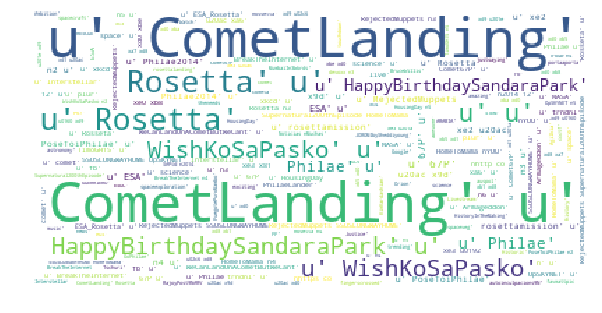

In [19]:
words = []

for key,val in hashtagCount.items():
    words.append(key)
    
words = [e[1:] for e in words]
stopwords = set(STOPWORDS)
stopwords.add("CometLanding")


wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=30000,max_font_size=40, random_state=42).generate(str(hashtags))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [20]:
data = [go.Bar(x=['Tweets', 'Retweets', 'Replies'],y=[numTweets,numReTweets,numReplies])]
layout = go.Layout(
    title='Number of Retweets, Replies and Tweets',
    yaxis=dict(
        title='Usage',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

In [49]:
dfSource = df
import re
items = []
for index, row in dfSource.iterrows():
    text = (row['source'])
    for token in str(text):
        if token.endswith('>'):
            split1 = text.split("</a>")
            split2 = str(split1).split(">")
            split2 = str(split2).split(",")
            items.append(str(split2[1]))
            
appCount = {}

for device in items:
    if device not in appCount:
        appCount[device] = 1
    else:
        counter = appCount.get(device,'none')
        appCount.update({device: counter+1})

In [50]:
topItems = sorted(appCount.items(), key=operator.itemgetter(1),reverse=True)

In [57]:
#Gets the top 4 applications
topApplication = topItems[0][0]
topApplicationNum = topItems[0][1]
    
secondApplication = topItems[1][0]
secondApplicationNum = topItems[1][1]
    
thirdApplication = topItems[2][0]
thirdApplicationNum = topItems[2][1]

fourthApplication = topItems[3][0]
fourthApplicationNum = topItems[3][1]

totalApplications = sum(appCount.values())
otherApplicationNum = (totalApplications-(topApplicationNum+secondApplicationNum+thirdApplicationNum+fourthApplicationNum))


In [61]:
labels = [topApplication,secondApplication,thirdApplication,fourthApplication," \"Other\'"]
values = [topApplicationNum,secondApplicationNum,thirdApplicationNum,fourthApplicationNum,otherApplicationNum]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

In [39]:
dfSource = df
import re
dates = []
for index, row in dfSource.iterrows():
    text = (row['created_at'])
    dates.append(text[0:10])
        
len(dates)


77267

In [40]:
dateCount = {}
counter =0

for date in dates:
    if date not in dateCount:
        dateCount[date] = 1
    else:
        counter = dateCount.get(date,'none')
        dateCount.update({date: counter+1})

In [97]:
values =[]
dateKeys = []
for key,val in dateCount.items():
    values.append(val)
    dateKeys.append(str(key))
    print("Date: "+ str(key) + " Number of Tweets: " + str(val))
    


Date: Wed Nov 26 Number of Tweets: 400
Date: Fri Nov 28 Number of Tweets: 711
Date: Mon Dec 01 Number of Tweets: 603
Date: Sun Nov 30 Number of Tweets: 343
Date: Thu Nov 27 Number of Tweets: 497
Date: Wed Nov 12 Number of Tweets: 73212
Date: Wed Dec 03 Number of Tweets: 311
Date: Tue Dec 02 Number of Tweets: 475
Date: Fri Dec 05 Number of Tweets: 87
Date: Thu Dec 04 Number of Tweets: 200
Date: Sat Nov 29 Number of Tweets: 428
